# LVQ

### 1. Generación de datos de ejemplo python

* Genera dos conjuntos de datos con 2 características cada uno (X, Y en un plano 2D).
* class1 se centra alrededor del punto [2,2] y class2 alrededor de [6,6].


In [1]:
import numpy as np

# Generar datos de ejemplo (2 clases, 2 características)
np.random.seed(42)
class1 = np.random.randn(50, 2) + [2, 2]  # Clase 1
class2 = np.random.randn(50, 2) + [6, 6]  # Clase 2


Combina los datos de ambas clases y asigna etiquetas: 0 para clase 1 y 1 para clase 2.


In [2]:
data = np.vstack((class1, class2))
labels = np.array([0] * 50 + [1] * 50)  # Etiquetas de clase

In [3]:
data

array([[ 2.49671415,  1.8617357 ],
       [ 2.64768854,  3.52302986],
       [ 1.76584663,  1.76586304],
       [ 3.57921282,  2.76743473],
       [ 1.53052561,  2.54256004],
       [ 1.53658231,  1.53427025],
       [ 2.24196227,  0.08671976],
       [ 0.27508217,  1.43771247],
       [ 0.98716888,  2.31424733],
       [ 1.09197592,  0.5876963 ],
       [ 3.46564877,  1.7742237 ],
       [ 2.0675282 ,  0.57525181],
       [ 1.45561728,  2.11092259],
       [ 0.84900642,  2.37569802],
       [ 1.39936131,  1.70830625],
       [ 1.39829339,  3.85227818],
       [ 1.98650278,  0.94228907],
       [ 2.82254491,  0.77915635],
       [ 2.2088636 ,  0.04032988],
       [ 0.67181395,  2.19686124],
       [ 2.73846658,  2.17136828],
       [ 1.88435172,  1.6988963 ],
       [ 0.52147801,  1.28015579],
       [ 1.53936123,  3.05712223],
       [ 2.34361829,  0.23695984],
       [ 2.32408397,  1.61491772],
       [ 1.323078  ,  2.61167629],
       [ 3.03099952,  2.93128012],
       [ 1.16078248,

In [4]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 2. Inicialización de prototipos

* Selecciona un punto aleatorio de cada clase como prototipo inicial.
* Estos prototipos se ajustarán durante el entrenamiento.

In [5]:
# Parámetros iniciales
n_classes = 2  # Número de clases
learning_rate = 0.1  # Tasa de aprendizaje
n_iterations = 100  # Iteraciones máximas

# Inicialización de prototipos (un punto aleatorio por clase)
prototypes = np.array([data[labels == i][np.random.choice(len(data[labels == i]))] for i in range(n_classes)])


### 3. Función para calcular la distancia euclidiana

In [6]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

### 4. Entrenamiento con LVQ

In [7]:
for iteration in range(n_iterations):
    for i in range(len(data)):
        x = data[i]  # Punto de datos actual
        y = labels[i]  # Etiqueta de clase del punto

        # Calculamos la distancia entre el punto y todos los prototipos:
        distances = np.array([euclidean_distance(x, prototype) for prototype in prototypes])
        # El prototipo más cercano se identifica con np.argmin
        closest_prototype_idx = np.argmin(distances)

        # Actualizamos el prototipo dependiendo de si es correcto o incorrecto
        # Si es correcto, el prototipo se mueve hacia el punto.
        # Si es incorrecto, el prototipo se aleja del punto.
        if closest_prototype_idx == y:  # Clase correcta
            prototypes[closest_prototype_idx] = prototypes[closest_prototype_idx] + learning_rate * (x - prototypes[closest_prototype_idx])
        else:  # Clase incorrecta
            prototypes[closest_prototype_idx] -= learning_rate * (x - prototypes[closest_prototype_idx])


### 5. Clasificación por prototipos

In [8]:
def classify(x, prototypes):
    distances = np.array([euclidean_distance(x, prototype) for prototype in prototypes])
    return np.argmin(distances)

### 6. Evaluación del modelo
* Clasifica cada punto de datos usando los prototipos ajustados.
* Calcula la precisión comparando las predicciones con las etiquetas verdaderas.

In [9]:
predictions = np.array([classify(x, prototypes) for x in data])
accuracy = np.mean(predictions == labels)
print(f"Precisión del modelo LVQ: {accuracy:.2f}")

Precisión del modelo LVQ: 1.00


### 7. Visualización de los datos y prototipos

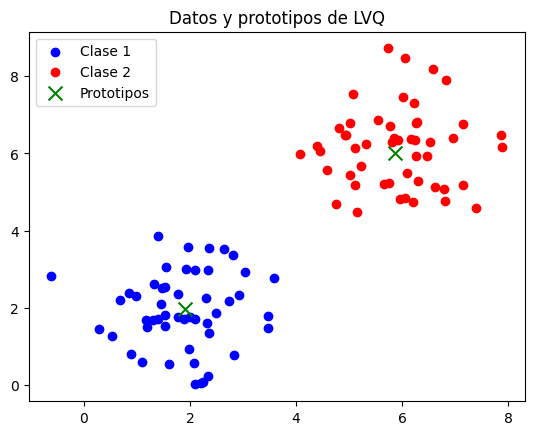

In [10]:
import matplotlib.pyplot as plt

plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Clase 1')
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Clase 2')
plt.scatter(prototypes[:, 0], prototypes[:, 1], color='green', marker='x', s=100, label='Prototipos')
plt.legend()
plt.title("Datos y prototipos de LVQ")
plt.show()
